# 前提条件
```秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。```

# 【問題1】100日目の米粒の数
```100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）```

100
100日目の米の数は633825300114114700748351602688粒です
累計の米の数は1267650600228229401496703205375粒です


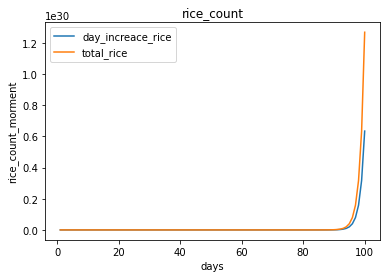

In [3]:
# 変数定義
rice_count = 1
rice_count_list = [rice_count]
total_rice_list = [rice_count_list[-1]] 
days = 100

# 日にち毎にもらえる米の量と、累積米の量
for day in range(days-1): 
    rice_count_list.append(rice_count_list[-1]*2)
    total_rice_list.append(total_rice_list[-1] + rice_count_list[-1])

#正しいか確認
print(len(rice_count_list))
print("100日目の米の数は{}粒です".format(rice_count_list[-1]))
print("累計の米の数は{}粒です".format(total_rice_list[-1]))

#図形化
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

plt.title("rice_count")
plt.xlabel("days")
plt.ylabel("rice_count_morment")
plt.plot(range(1, days + 1),rice_count_list, label ="day_increace_rice")
plt.plot(range(1, days + 1),total_rice_list, label = "total_rice")
plt.legend(loc="best")
plt.show()

# 【問題2】100日目以外の米粒の数
```この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。```


- 以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。



10日後にもらえる米の数は512粒です
10日後にもらえるトータルの米の数は1023です


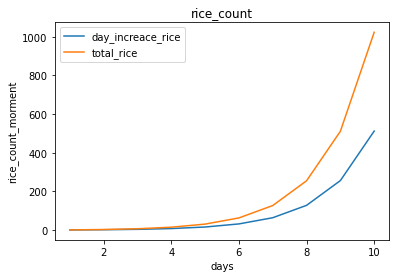

In [39]:
#関数化　デフォルトでは100にて設定
#基本的に問題１の内容にdefで関数化しただけ
#また、図式化するためにリストを用意している

def compute_sorori_shinzaemon(day=100):
    # 初期値の設定
    n_grains = 1
    list_n_grains = [n_grains] 
    list_total_grains=[list_n_grains[-1]]
    
    # 倍々ゲームを関数化
    for num in range(day-1):
        list_n_grains.append(list_n_grains[-1]*2)
        list_total_grains.append(list_total_grains[-1] + list_n_grains[-1])        
    return list_n_grains, list_total_grains

# 関数から定数を所得
list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=10)



#正しいか確認
day=10
print("{}日後にもらえる米の数は{}粒です".format(day,list_n_grains[-1]))
print("{}日後にもらえるトータルの米の数は{}です".format(day,list_total_grains[-1]))

# 図形化
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

plt.title("rice_count")
plt.xlabel("days")
plt.ylabel("rice_count_morment")
plt.plot(range(1, day + 1),list_n_grains, label ="day_increace_rice")
plt.plot(range(1, day + 1),list_total_grains, label = "total_rice")
plt.legend(loc="best")
plt.show()

# 【問題3】貰える米で何人が何日生活できるか
1. この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


2. 関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。


3. ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [43]:
# 参考文献
#１日の米の消費量：https://resemom.jp/article/2015/04/10/23996.html#:~:text=%E6%97%A5%E6%9C%AC%E3%81%AE%E3%81%B2%E3%81%A8%E3%82%8A%E3%81%82%E3%81%9F%E3%82%8A%E3%81%AE,%E3%81%A7%E7%B4%B9%E4%BB%8B%E3%81%95%E3%82%8C%E3%81%A6%E3%81%84%E3%82%8B%E3%80%82
#１粒のグラム数：https://oshiete.goo.ne.jp/qa/1875413.html

school_term = 120 

#関数化
def how_many_people_survive(rice_count, people=14, amount_rice_consumption=119, amount_rice_gram=50):
    """
    amount_rice_consumption  #１日の米の消費量（g）
    amount_rice_gram # １gあたりの米粒の量 
    """
    # 消費量を計算     
    all_people_rice_consumption = amount_rice_consumption * amount_rice_gram * people
    survival_years = rice_count / all_people_rice_consumption / 365 / 10000 #１万年単位で所得してみる
    return survival_years

# 問題2からトータルの消費量の米を所得する 
_, list_total_grains = compute_sorori_shinzaemon(school_term)

# 何万年生きられるか所得する
survival_years = how_many_people_survive(list_total_grains[-1])

people = 14
print("{}人が{}万年生きる事ができる".format(people,survival_years))
print("米粒のトータル数は{}粒です".format(list_total_grains[-1]))


14人が4.3718133690240454e+24万年生きる事ができる
米粒のトータル数は1329227995784915872903807060280344575粒です
